In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_file = "./data/train.csv"
test_file = "./data/test.csv"

data_train = pd.read_csv(train_file, engine='python')
data_test = pd.read_csv(test_file, engine='python')

# Data
 주어진 데이터를 확인했을 때 기본적으로 categorical data가 많이 존재한다. 따라서 주어진 데이터만으로는 정밀한 예측이 어렵기 때문에 categorical한 변수를 dummy로 바꾸어 correlation matrix를 생성해보려 한다. 일단 데이터가 없는 부분부터 확인하여 데이터를 삽입해주겠다.
 

In [3]:
print('data_train')
display(data_train.head())

display(data_train.keys())
display(data_train.shape)

data_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(1460, 81)

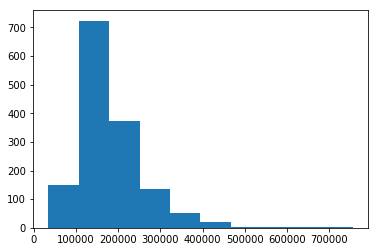

In [4]:
plt.hist(data_train.SalePrice)
plt.show()

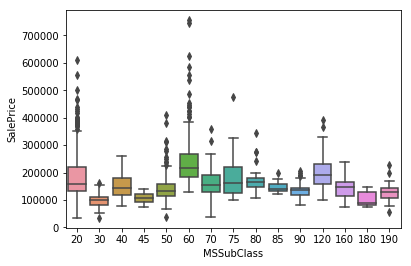

In [5]:
sns.boxplot(x='MSSubClass', y='SalePrice', data=data_train)

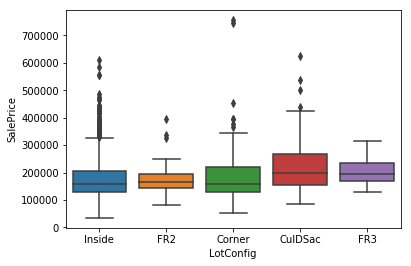

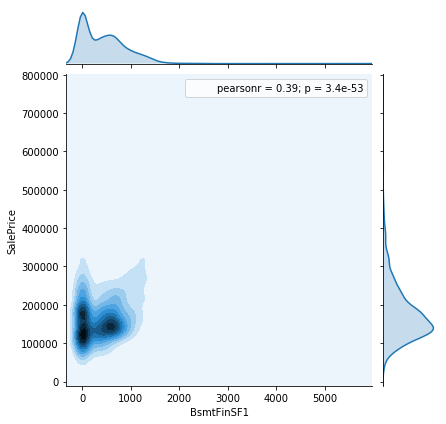

In [6]:
sns.boxplot(x='LotConfig', y='SalePrice', data=data_train)
sns.jointplot(x='BsmtFinSF1', y='SalePrice', data=data_train,kind='kde')

In [7]:
print('train dataset\n----------------')
tmp = data_train.isnull().sum()
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])

print('\n\ntest dataset\n----------------')
tmp = data_test.isnull().sum()
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])

train dataset
----------------
LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


test dataset
----------------
MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


In [8]:
#Save the 'Id' column
train_ID = data_train['Id']
test_ID = data_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
data_train.drop("Id", axis = 1, inplace = True)
data_test.drop("Id", axis = 1, inplace = True)

 방금 전 확인하였던 train data와 test data가 서로 빈 데이터를 가진 columns 자체가 다르다. 이로써 발생해주는 문제는 추후에 one-show-encoding을 통해 categorical data를 dummy data로 만들었을때 서로 다른 columns을 가진 두개의 dataframe이 생긴다는 것이다. 따라서 이를 해결하기 위하여 먼저 처리해줄 내용은 아래와 같다.
 
 - train data 에서 label 값인 SalePrice를 미리 저장
 - train data와 test data를 merge
 - merge한 데이터에서 label인 SalePrice 제거
 - merge한 데이터에서 빈 데이터값을 확인하고 채워준 후에 다시 train data와 test data로 나누기

In [9]:
num_train = data_train.shape[0]
y_train = data_train.SalePrice

# 데이터를 합치고 index 재설정
data_all = pd.concat((data_train, data_test)).reset_index(drop=True)
display(data_all)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [10]:
tmp = data_all.isnull().sum()
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])

Alley 2721
BsmtCond 82
BsmtExposure 82
BsmtFinSF1 1
BsmtFinSF2 1
BsmtFinType1 79
BsmtFinType2 80
BsmtFullBath 2
BsmtHalfBath 2
BsmtQual 81
BsmtUnfSF 1
Electrical 1
Exterior1st 1
Exterior2nd 1
Fence 2348
FireplaceQu 1420
Functional 2
GarageArea 1
GarageCars 1
GarageCond 159
GarageFinish 159
GarageQual 159
GarageType 157
GarageYrBlt 159
KitchenQual 1
LotFrontage 486
MSZoning 4
MasVnrArea 23
MasVnrType 24
MiscFeature 2814
PoolQC 2909
SalePrice 1459
SaleType 1
TotalBsmtSF 1
Utilities 2


 null값이 들어가있는 데이터를 확인하여 분석한 내용은 아래와 같다. -> 다음에 있는 값은 대체해줄 데이터이다.
 - Alley : 골목 접근 유형(Category) -> 'None'
 - Bsmt___ : (Category) -> 'None'
 - BsmtFinSF1 : FinType 1의 평방미터, Type1이 None인 경우 0.0으로 초기화되어있음 -> BsmtFinType1 isnull 확인 후 null이면 mean
 - BsmtFinSF2 : FinType 2의 평방미터, Type2이 None인 경우 0.0으로 초기화되어있음 -> BsmtFinType2 isnull 확인 후 null이면 mean
 - BsmtFullBath : fullbath 개수 -> 0.0
 - BsmtHalfBath : halfbath 개수 -> 0.0
 - BsmtUnfSF : Unfinished basement의 평방미터, 1개밖에 없으니 해당 index 삭제
 - Electrical : categorical data, None의 해당하는 data 없음, index 삭제
 - Exterior1st : categorical data, None의 해당하는 data 없음, index 삭제
 - Exterior2nd : categorical data, None의 해당하는 data 없음, index 삭제
 - Fence : 펜스 품질(Category) -> 'None'
 - FireplaceQu : 벽난로 품질(Category) -> 'None'
 - Functional :  categorical data, None의 해당하는 data 없음, index 삭제
 - GarageArea : 차고 넓이 (float) -> '0.0'
 - GarageCars : 차고에 차가 얼마나 들어가는지(Int) -> '0'
 - GarageCond : 차고 컨디션 -> 'None'
 - GarageFinish : 차고 내부공사 마무리 여부(Category) -> 'None'
 - GarageQual : 차고 품질(Category) -> 'None'
 - GarageType : 차고 타입(Category) -> 'None'
 - GarageYrBit : 차고 완공 년도(Int(year)) -> mean
 - KitchenQual : categorical data, None의 해당하는 data 없음, index 삭제
 - LotFrontage : 길과의 거리(float) -> mean
 - MSZoning : categorical data, None의 해당하는 data 없음, index 삭제
 - MasVnrType : 벽돌유형(Category) -> 'None'
 - MasVnrArea : 벽돌면적(float) -> mean
 - MiscFeature : 기타 특징(Category) -> 'None'
 - PoolQC : 풀 품질(Category) -> 'None'
 - SaleType : index 삭제
 - TotalBsmtSF : index 삭제
 - Utilities : index 삭제
 
 
 

In [11]:
# BsmtFinSF1 : BsmtFinType1 isnull 확인 후 null이면 mean
data_all.BsmtFinSF1 = data_all.BsmtFinType1.fillna(data_all.BsmtFinSF1.mean())

# BsmtFinSF2 : BsmtFinType2 isnull 확인 후 null이면 mean
data_all.BsmtFinSF2 = data_all.BsmtFinType2.fillna(data_all.BsmtFinSF2.mean())

# BsmtFullBath : fullbath 개수 -> 0.0
data_all.BsmtFullBath = data_all.BsmtFullBath.fillna(0.0)

# BsmtHalfBath : halfbath 개수 -> 0.0
data_all.BsmtHalfBath = data_all.BsmtHalfBath.fillna(0.0)

# GarageArea : 차고 넓이 (float) -> '0.0'
data_all.GarageArea = data_all.GarageArea.fillna(0.0)

# GarageCars : 차고에 차가 얼마나 들어가는지(Int) -> '0'
data_all.GarageCars = data_all.GarageCars.fillna(0.0)

# GarageYrBit : 차고 완공 년도(Int(year)) -> mean
data_all.GarageYrBlt = data_all.GarageYrBlt.fillna(int(data_all.GarageYrBlt.mean()))


# LotFrontage : 길과의 거리(float) -> mean
data_all.LotFrontage = data_all.LotFrontage.fillna(data_all.LotFrontage.mean())

# MasVnrArea : 벽돌면적(float) -> mean
data_all.MasVnrArea = data_all.MasVnrArea.fillna(data_all.MasVnrArea.mean())

# BsmtUnfSF : Unfinished basement의 평방미터, 1개밖에 없으니 해당 index 삭제
# Electrical : categorical data, None의 해당하는 data 없음, index 삭제
# Exterior1st : categorical data, None의 해당하는 data 없음, index 삭제
# Exterior2nd : categorical data, None의 해당하는 data 없음, index 삭제
# Functional : categorical data, None의 해당하는 data 없음, index 삭제
# KitchenQual : categorical data, None의 해당하는 data 없음, index 삭제
# MSZoning : categorical data, None의 해당하는 data 없음, index 삭제
# SaleType : index 삭제
# TotalBsmtSF : index 삭제
# Utilities : index 삭제
subset_nan = ['BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual', 'MSZoning', 'SaleType', 'TotalBsmtSF', 'Utilities']
data_all = data_all.dropna(subset=subset_nan)
# tmp = data_train.isnull().sum()
# for i in tmp.index:
#     if tmp[i] != 0:
#         print(i, tmp[i])

# fill nan to 'None'
data_all = data_all.fillna('None')

In [12]:
data_all[data_all.BsmtUnfSF.isnull()]
tmp = data_all.isnull().sum()

# nan값이 들어가있는 data가 있는지 확인하는 과정
for i in tmp.index:
    if tmp[i] != 0:
        print(i, tmp[i])

display(data_all.shape)

#reindex
data_all = data_all.reset_index(drop=True)

(2908, 80)

In [13]:
data_all.MSSubClass = data_all.MSSubClass.apply(str)
display(data_all.MSSubClass)

0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
       ... 
2878     30
2879     30
2880     50
2881     30
2882    190
2883     50
2884    120
2885    120
2886     20
2887     90
2888     20
2889     80
2890     20
2891     20
2892     20
2893     20
2894     90
2895    160
2896     20
2897     90
2898    180
2899    160
2900     20
2901    160
2902    160
2903    160
2904    160
2905     20
2906     85
2907     60
Name: MSSubClass, Length: 2908, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data_all[c].values)) 
    data_all[c] = lbl.transform(list(data_all[c].values))

# shape        
print('Shape all_data: {}'.format(data_all.shape))

Shape all_data: (2908, 80)


In [21]:
data_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,11.693,11.686,0.000,1,1.541,1Fam,4,3,GLQ,Unf,...,WD,0.000,1,2.603,11.693,AllPub,0.000,14.188,14.188,2
1,12.792,0.000,0.000,1,1.541,1Fam,4,1,ALQ,Unf,...,WD,0.000,1,2.260,12.792,AllPub,9.010,14.145,14.145,1
2,11.892,11.725,0.000,1,1.541,1Fam,4,2,GLQ,Unf,...,WD,0.000,1,2.260,11.892,AllPub,0.000,14.184,14.186,2
3,12.014,11.354,0.000,1,1.541,1Fam,1,3,ALQ,Unf,...,WD,0.000,1,2.440,11.354,AllPub,0.000,14.048,14.136,0
4,12.511,12.271,0.000,1,1.820,1Fam,4,0,GLQ,Unf,...,WD,0.000,1,2.750,12.511,AllPub,8.014,14.183,14.183,2


In [22]:

from scipy.stats import norm, skew #for some statistics

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
numeric_feats = data_all.dtypes[data_all.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data_all[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
PoolArea,15.091
3SsnPorch,8.907
LowQualFinSF,8.830
MiscVal,5.620
LandSlope,4.987
BsmtHalfBath,3.780
KitchenAbvGr,3.690
ScreenPorch,2.978
EnclosedPorch,2.031
OverallCond,0.640


In [23]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    data_all[feat] = boxcox1p(data_all[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])





There are 56 skewed numerical features to Box Cox transform


In [24]:
display(data_all.head())
asdfgv

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,3.093,3.092,0.000,0.730,1.001,1Fam,1.820,1.541,GLQ,Unf,...,WD,0.000,0.730,1.413,3.093,AllPub,0.000,3.359,3.359,1.194
1,3.216,0.000,0.000,0.730,1.001,1Fam,1.820,0.730,ALQ,Unf,...,WD,0.000,0.730,1.293,3.216,AllPub,2.752,3.355,3.355,0.730
2,3.116,3.097,0.000,0.730,1.001,1Fam,1.820,1.194,GLQ,Unf,...,WD,0.000,0.730,1.293,3.116,AllPub,0.000,3.359,3.359,1.194
3,3.130,3.054,0.000,0.730,1.001,1Fam,0.730,1.541,ALQ,Unf,...,WD,0.000,0.730,1.357,3.054,AllPub,0.000,3.346,3.354,0.000
4,3.185,3.159,0.000,0.730,1.122,1Fam,1.820,0.000,GLQ,Unf,...,WD,0.000,0.730,1.462,3.185,AllPub,2.605,3.359,3.359,1.194


NameError: name 'asdfgv' is not defined

In [31]:
data_all = pd.get_dummies(data_all)
print(data_all.shape)
for i in data_all.keys():
    print(i, end=' ')

(2908, 898)
1stFlrSF 2ndFlrSF 3SsnPorch Alley BedroomAbvGr BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtFullBath BsmtHalfBath BsmtQual BsmtUnfSF CentralAir EnclosedPorch ExterCond ExterQual Fence FireplaceQu Fireplaces FullBath Functional GarageArea GarageCars GarageCond GarageFinish GarageQual GarageYrBlt GrLivArea HalfBath HeatingQC KitchenAbvGr KitchenQual LandSlope LotArea LotFrontage LotShape LowQualFinSF MSSubClass MasVnrArea MiscVal MoSold OpenPorchSF OverallCond OverallQual PavedDrive PoolArea PoolQC ScreenPorch Street TotRmsAbvGrd TotalBsmtSF WoodDeckSF YearBuilt YearRemodAdd YrSold BldgType_1Fam BldgType_2fmCon BldgType_Duplex BldgType_Twnhs BldgType_TwnhsE BsmtFinSF1_441.4232350925291 BsmtFinSF1_ALQ BsmtFinSF1_BLQ BsmtFinSF1_GLQ BsmtFinSF1_LwQ BsmtFinSF1_Rec BsmtFinSF1_Unf BsmtFinSF2_49.58224811514736 BsmtFinSF2_ALQ BsmtFinSF2_BLQ BsmtFinSF2_GLQ BsmtFinSF2_LwQ BsmtFinSF2_Rec BsmtFinSF2_Unf Condition1_Artery Condition1_Feedr Condition1_Norm Condition1_PosA Condition1_P

In [ ]:
sns.boxplot(x='MSSubClass', y='SalePrice', data=data_all)

In [ ]:
#correlation matrix
corrmat = data_all.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

 일단 dummy 변수로 변환하기 전 correlation matrix를 확인하고, SalePrice와 가장 연관성이 높은 10개의 index만 추출하여 heatmap으로 표현해보겠다.

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice').index
display(cols)
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# change categorical variable to dummy variable
dummy_train = pd.get_dummies(data_train)
data_train.head()

categorycal data를 one-hot-encoding하여 dummy 변수로 변경하니 index가 81개에서 305개로 증가하였다. 

In [ ]:
# SalePrice column을 맨 앞으로 옮기는 과정
cols = list(set(dummy_train.columns.tolist()) - set(['SalePrice']))
cols.insert(0, 'SalePrice')
dummy_train = dummy_train[cols]
display(dummy_train.head())
dummy_train.shape

# One-shot-encoding
 주어진 categorical data들을 모두 one-shot-encoding을 활용해서 수치화하여 SalePrice(Lable)과의 연관성이 0.5 이상인 columns을 구한 code이다. one-show-encoding 전에서 0.5 이상인 column의 개수는 11개였고, 처리 후 column의 개수는 16개로 증가하였다. 위의 코드에서는 나오지 않았지만, 처리 전 0.3 이상인 column의 개수는 19개, 처리 후 0.3 이상인 column의 개수는 59개로 많이 증가하였다.

In [ ]:
# Train data(dummy)로 corrmat 생성
corrmat = dummy_train.corr()

# 생성된 corrmat 중 SalePrice와의 연관이 0.5 이상인 columns 추출
corr_up = np.where(abs(corrmat['SalePrice'])>0.5)
predict_cols = corrmat['SalePrice'][list(corr_up[0])].keys()

display(corrmat['SalePrice'][predict_cols])
display(corrmat['SalePrice'][predict_cols].shape)

In [ ]:
# SalePrice 상관관계의 절댓값이 0.5 이상인 feature 추출된 데이터를 heatmap으로 표시
cm = np.corrcoef(dummy_train[predict_cols].values.T)
sns.set(font_scale=0.75)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=predict_cols.values, xticklabels=predict_cols.values)
plt.show()

In [ ]:
predict_cols

In [ ]:
tmp_cols = dict()
tmp_cols[0] = ['SalePrice', 'KitchenQual_TA', 'FullBath']
tmp_cols[1]  = ['SalePrice', 'GrLivArea', 'OverallQual']
tmp_cols[2]  = ['SalePrice', 'YearRemodAdd', '1stFlrSF']
tmp_cols[3]  = ['SalePrice', 'TotRmsAbvGrd', 'YearBuilt']
tmp_cols[4]  = ['SalePrice', 'KitchenQual_Ex', 'TotalBsmtSF']
tmp_cols[5]  = ['SalePrice', 'GarageCars', 'ExterQual_TA']
tmp_cols[6]  = ['SalePrice', 'GarageArea', 'BsmtQual_Ex']

In [ ]:
sns.pairplot(dummy_train[tmp_cols[0]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[0]])

In [ ]:
sns.pairplot(dummy_train[tmp_cols[1]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[1]])

In [ ]:
sns.pairplot(dummy_train[tmp_cols[2]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[2]])

In [ ]:
sns.pairplot(dummy_train[tmp_cols[3]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[3]])

In [ ]:
sns.pairplot(dummy_train[tmp_cols[4]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[4]])

In [ ]:
sns.pairplot(dummy_train[tmp_cols[5]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[5]])

In [ ]:
sns.pairplot(dummy_train[tmp_cols[6]], size = 2.5)
plt.show();
display(corrmat['SalePrice'][tmp_cols[6]])

MSSubClass 데이터는 categorical data인데 int로 나누어져 있던 데이터였기 때문에 SalePrice에 영향을 주지 않은 것으로 보인다. 따라서 이 데이터를 변경해주는 작업이 필요하다.

In [ ]:
# MSSubClass column이 int로 category가 나뉘어져있었음, str로 바꾸고 다시 one-shot-encoding 진행
for i in range(data_train.shape[0]):
    data_train.MSSubClass.loc[i] = str(data_train.MSSubClass.loc[i])

In [ ]:
# change categorical variable to dummy variable
dummy_train = pd.get_dummies(data_train)
dummy_train.head()

In [ ]:
# SalePrice column을 맨 앞으로 옮기는 과정
cols = list(set(dummy_train.columns.tolist()) - set(['SalePrice']))
cols.insert(0, 'SalePrice')
dummy_train = dummy_train[cols]
display(dummy_train.head())

 MSSubClass의 데이터를 변경하고 연관이 0.3 이상인 columns을 검색해봤는데 MSSubclass가 dummy 변수로 바뀌어도 추가되는 column이 존재하지 않았다.

In [ ]:
# Train data(dummy)로 corrmat 생성
corrmat = dummy_train.corr()

# 생성된 corrmat 중 SalePrice와의 연관이 0.5 이상인 columns 추출
corr_up = np.where(abs(corrmat['SalePrice'])>0.3)
predict_cols = corrmat['SalePrice'][list(corr_up[0])].keys()

display(corrmat['SalePrice'][predict_cols])
display(corrmat['SalePrice'][predict_cols].shape)

In [ ]:
sns.distplot(data_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)
plt.show()

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
dummy_train["SalePrice"] = np.log1p(dummy_train["SalePrice"])

#Check the new distribution 
sns.distplot(dummy_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dummy_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dummy_train['SalePrice'], plot=plt)
plt.show()

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)